In [184]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [105]:
N = 2000
M = 3 # 3 sources

f = 60 # 60 Hz
T = 1/1000 # sampling rate

s1_file = scipy.io.loadmat("data/s1_file.mat")

s1 = 2*np.random.rand(N) - 1
s2 = np.sin(2*np.pi*f*np.arange(N)*T + np.pi*np.random.rand())
x1 = np.concatenate(
    [np.ones(int(N/10)), 0.5*np.ones(int(N/10)), 0.25*np.ones(int(N/10)), -0.5*np.ones(int(N/10)), -np.ones(int(N/10))], axis=0
)
x2 = np.concatenate(
    [np.ones(int(N/10)), 0.5*np.ones(int(N/10)), 0.25*np.ones(int(N/10)), -0.5*np.ones(int(N/10)), -np.ones(int(N/10))], axis=0
)
x3 = np.concatenate([x1, x2])
s3 = x3*(np.cos(2*np.pi*2*f*np.arange(N)*T))

#let us first normalize the sources so that theur covariance matrix is the indetity matrix
Sx = np.stack([s1, s2, s3])
bar_sx = Sx.mean(axis=1) # mean vector; Mx1
Scx = Sx - (bar_sx.reshape(-1, 1)@np.ones((1, N)))

Rs_hat = np.zeros((M, M))
for n in range(N):
    Rs_hat += Scx[:, n].reshape(-1, 1)@Scx[:, n].reshape(-1, 1).T
Rs_hat = Rs_hat / (N-1)

Ds, Us = np.linalg.eig(Rs_hat)
Ds = np.diag(np.sqrt(Ds))
S = np.linalg.inv(Ds)@(Us.T)@Scx # this is now the source matrix (zero mean and unit covariance matrix)

print("Covariance matrix of sources orthogonal")
print(S@S.T/(N-1))

s1n = S[0, :] # original sources with zero mean and unit variance; these are the sources we want to recorver
s2n = S[1, :]
s3n = S[2, :]

# Start data processing; Random mixing matrix
# Uncomment the line below to generate A randomly
# A = np.random.rand((M, M)) + 0.1*np.eye(M) # intertible matrix

A = np.array([
    [0.4499, 0.5785, 0.8613],
    [0.0143, 1.0344, 0.6652],
    [0.9680, 0.7432, 0.9624]
])
W = np.linalg.inv(A)
H = np.zeros((M, N))

H = A@S # mixing of sources

h1n = H[0, :] # mixed signals
h2n = H[1, :]
h3n = H[2, :]

a = 1500 #interval
b = 2000

Covariance matrix of sources orthogonal
[[ 1.00000000e+00  5.10069448e-16 -4.23206576e-16]
 [ 5.10069448e-16  1.00000000e+00  2.27487419e-16]
 [-4.23206576e-16  2.27487419e-16  1.00000000e+00]]


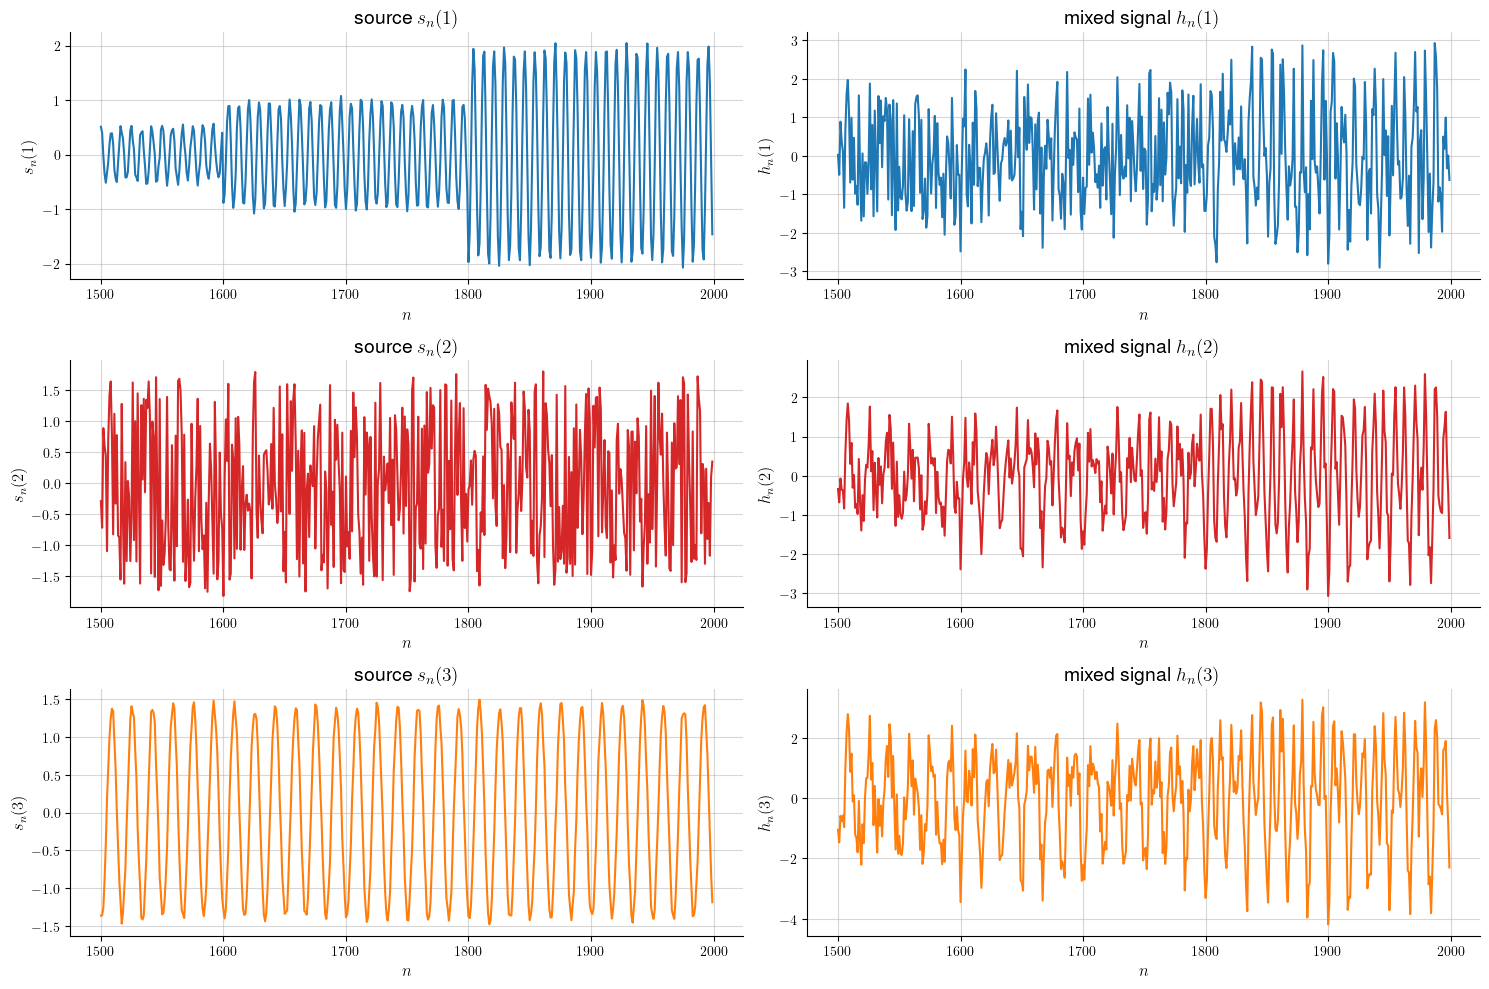

In [106]:
# figure 2 (mixed signals)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(321)

ax.plot(np.arange(a, b), s3n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(1)$", fontsize=12)
ax.set_title("source $s_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(322)

ax.plot(np.arange(a, b), h2n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$h_n(1)$", fontsize=12)
ax.set_title("mixed signal $h_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(323)

ax.plot(np.arange(a, b), s2n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(2)$", fontsize=12)
ax.set_title("source $s_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(324)

ax.plot(np.arange(a, b), h1n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$h_n(2)$", fontsize=12)
ax.set_title("mixed signal $h_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(325)

ax.plot(np.arange(a, b), s1n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(3)$", fontsize=12)
ax.set_title("source $s_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(326)

ax.plot(np.arange(a, b), h3n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$h_n(3)$", fontsize=12)
ax.set_title("mixed signal $h_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

plt.savefig("figs/fig-2.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [107]:
# Data pre-processing

bar_h = H.mean(axis=1) # mean vector; Mx1
Hc = H - (bar_h.reshape(-1, 1)@np.ones((1, N))) # centering

Rh_hat = np.zeros((M, M))
for n in range(N):
    Rh_hat += Hc[:, n].reshape(-1, 1)@Hc[:, n].reshape(-1, 1).T
Rh_hat = Rh_hat / (N-1)

D, U = np.linalg.eig(Rh_hat)
D = np.diag(np.sqrt(D))
Hprime = np.linalg.inv(D)@U.T@Hc
Aprime = np.linalg.inv(D)@(U.T)@A

Rh_test = np.zeros((M, M)) # this calculation is just to check to see if we get the identity matrix
for n in range(N):
    Rh_test += Hprime[:, n].reshape(-1, 1)@Hprime[:, n].reshape(-1, 1).T

print("Rh_test should be identity matrix: ")
print(Rh_test/(n-1))

print("Aprime should be orthogonal or close-to-orthogonal")
print(Aprime@Aprime.T)

Rh_test should be identity matrix: 
[[ 1.00050050e+00 -1.28034053e-14 -1.36294046e-15]
 [-1.28034053e-14  1.00050050e+00 -7.37370347e-17]
 [-1.36294046e-15 -7.37370347e-17  1.00050050e+00]]
Aprime should be orthogonal or close-to-orthogonal
[[ 1.00000000e+00 -1.24803873e-14 -2.92568419e-15]
 [-1.24803873e-14  1.00000000e+00  2.23957733e-15]
 [-2.92568419e-15  2.23957733e-15  1.00000000e+00]]


In [108]:
# Maximun-likelihood-based ICA

mu = 0.5 # step-size
Wprime2 = np.eye(M)
for n in range(N):
    h = Hprime[:, n]
    g = np.zeros(M)
    for m in range(M):
        a = Wprime2[m, :] @ h 
        b = np.exp(-a)
        g[m] = (1-b) / (1+b)
        Wprime2[m, :] -= mu*g[m]*h.T
    
    for m in range(M): # can use this implementation as well; Gram-Schimidt
        x = (Wprime2[m, :]).T
        for ell in range(m):
            x -= (Wprime2[m, :]@Wprime2[ell, :].T)*(Wprime2[ell, :].T)
        x = x/np.linalg.norm(x)
        Wprime2[m, :] = x.T

print("Wprime2 multiplied by its transpose should be close to identity")
print(Wprime2@Wprime2.T)

print("Wprime2 multiplied by Aprime should be close to identity")
print(Aprime@Wprime2)

Sp_hat2 = Wprime2@Hprime # estimates of s' signals
s1p_hat2 = Sp_hat2[0, :]
s2p_hat2 = Sp_hat2[1, :]
s3p_hat2 = Sp_hat2[2, :]

a = 1500 #interval
b = 2000

Wprime2 multiplied by its transpose should be close to identity
[[ 1.00000000e+00 -3.87260025e-17  1.42710243e-16]
 [-3.87260025e-17  1.00000000e+00 -2.25296038e-16]
 [ 1.42710243e-16 -2.25296038e-16  1.00000000e+00]]
Wprime2 multiplied by Aprime should be close to identity
[[ 0.90666681 -0.18271525  0.38022418]
 [-0.045849    0.85330988  0.51938436]
 [ 0.4193485   0.48834146 -0.76529044]]


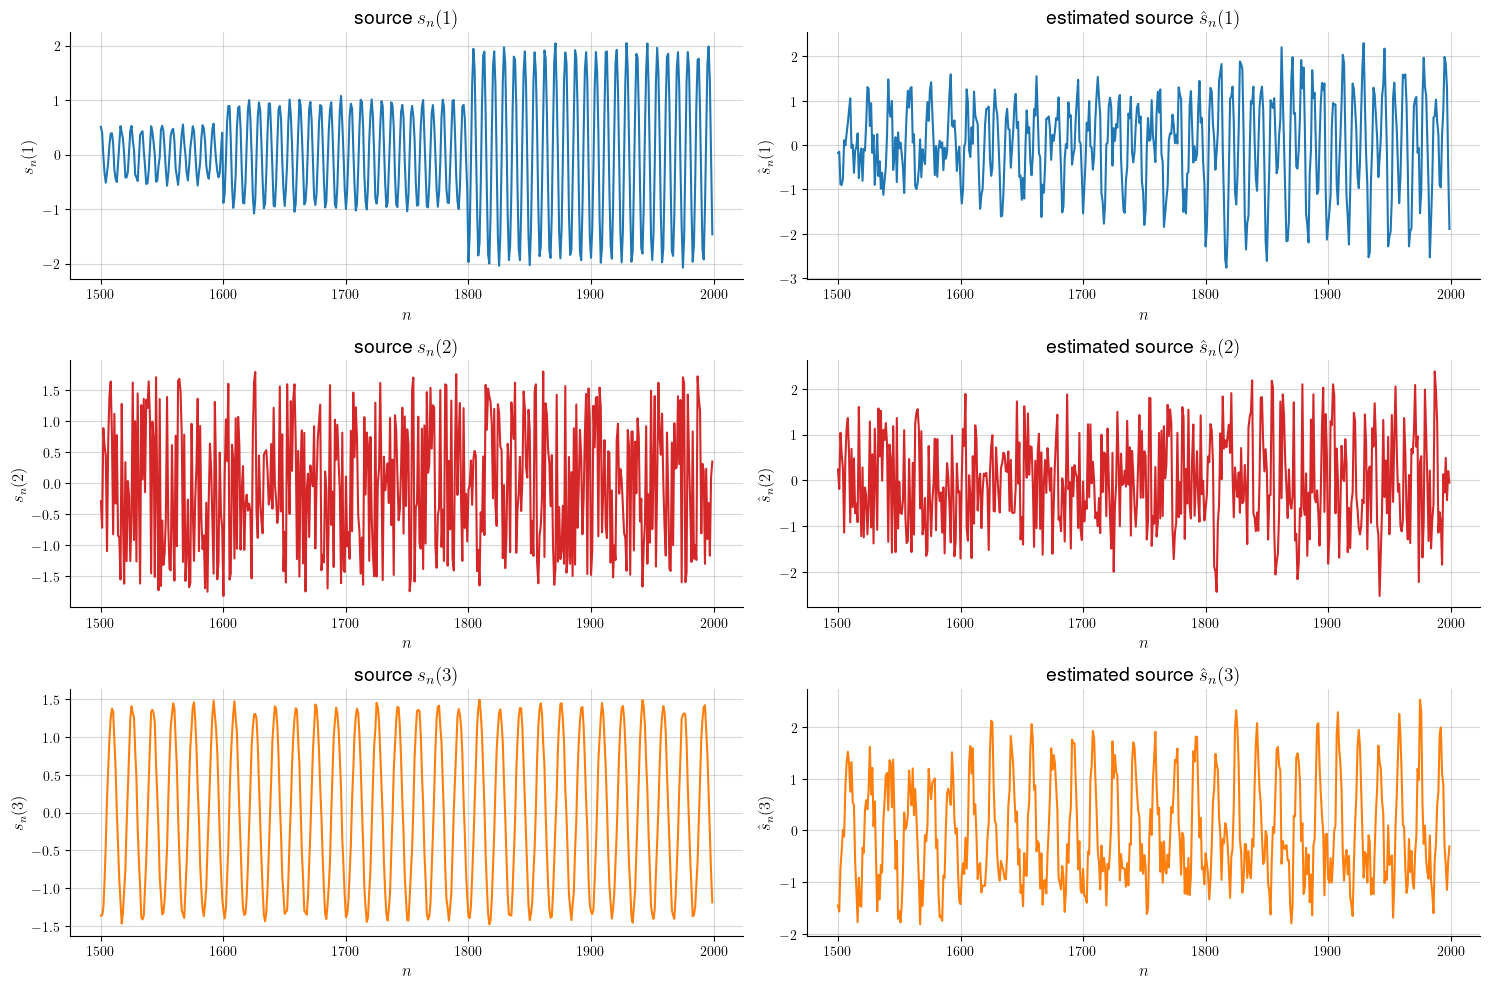

In [109]:
# figure 3 (maximum likelihood)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(321)

ax.plot(np.arange(a, b), s3n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(1)$", fontsize=12)
ax.set_title("source $s_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(322)

ax.plot(np.arange(a, b), s3p_hat2[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(1)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(323)

ax.plot(np.arange(a, b), s2n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(2)$", fontsize=12)
ax.set_title("source $s_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(324)

ax.plot(np.arange(a, b), s1p_hat2[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(2)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(325)

ax.plot(np.arange(a, b), s1n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(3)$", fontsize=12)
ax.set_title("source $s_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(326)

ax.plot(np.arange(a, b), s2p_hat2[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(3)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

plt.savefig("figs/fig-3.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [110]:
# Mutual Information; w is not orthogonal
W_hat = np.random.rand(M, M)
mu = 0.02 # step-size

for n in range(N):
    h = H[:, n]
    g = np.zeros(M)
    for m in range(M):
        row = W_hat[m, :]
        a = row@h 
        b = np.exp(-a)
        g[m] = (1-b)/(1+b)
    XX = (np.linalg.inv(W_hat)).T
    W_hat += mu*(XX-g.reshape(-1, 1)@H[:, n].reshape(-1, 1).T)

print("W-hat multiplied by A should be close to identity")
print(A@W_hat)

Sp_hat3 = W_hat@H # estimates of the S' signals
s1p_hat3 = Sp_hat3[0, :]
s2p_hat3 = Sp_hat3[1, :]
s3p_hat3 = Sp_hat3[2, :]

a = 1500 # interval
b = 2000

W-hat multiplied by A should be close to identity
[[-1.33987787  0.73551485  1.61741633]
 [-4.31564279  2.28116564  2.64060114]
 [-2.14881318  0.29132767  2.91148688]]


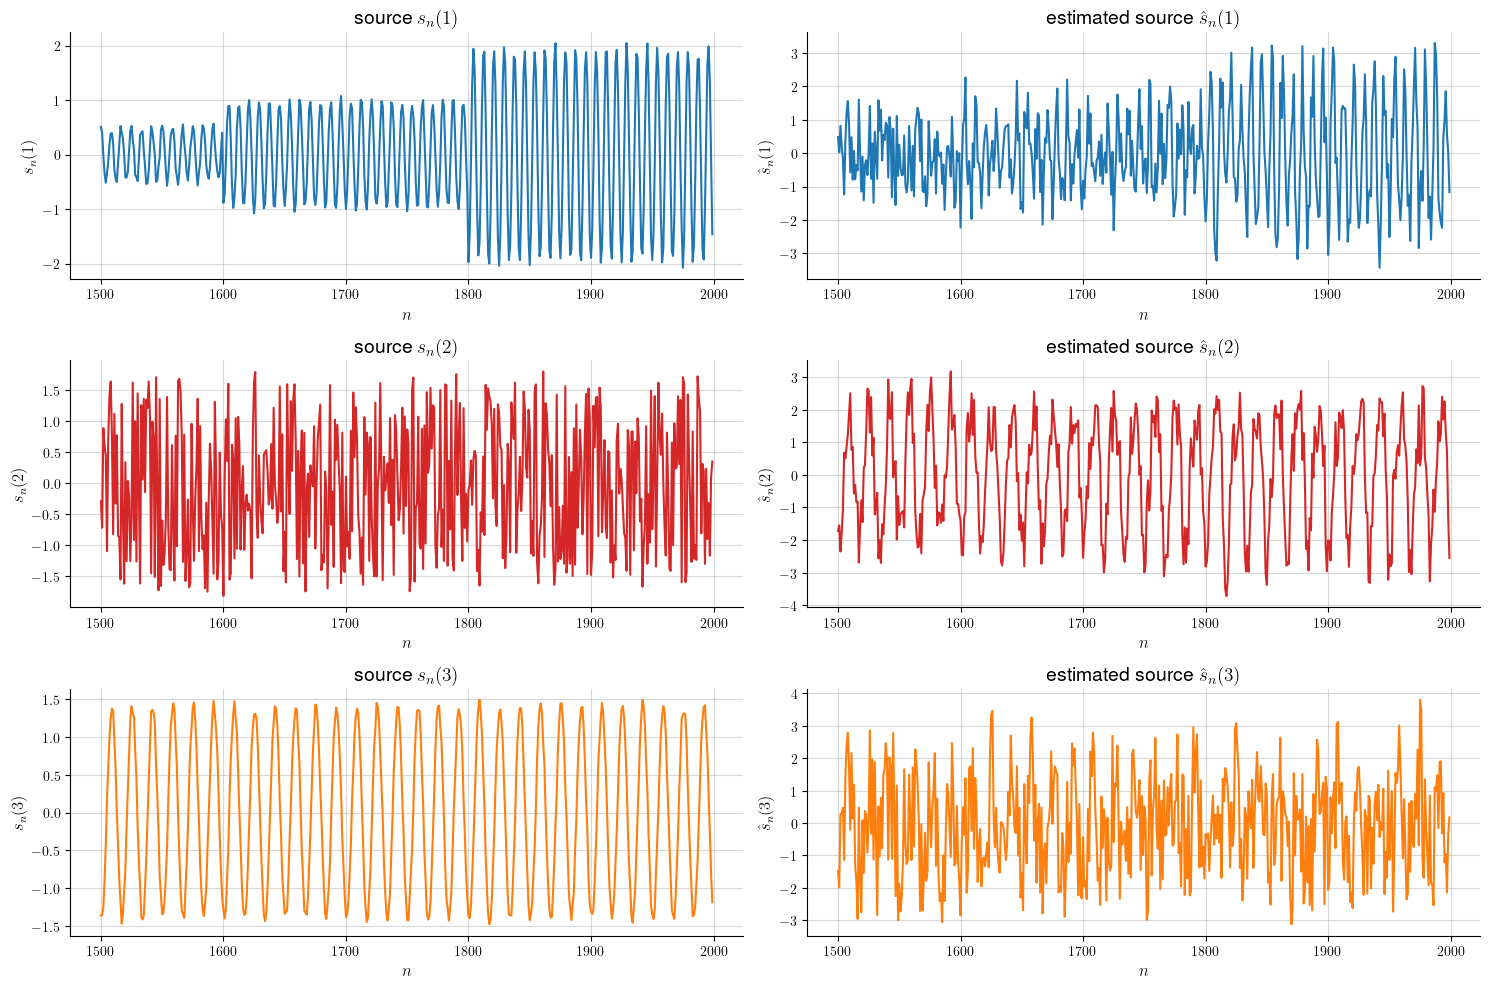

In [111]:
# figure 4 (mutual information)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(321)

ax.plot(np.arange(a, b), s3n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(1)$", fontsize=12)
ax.set_title("source $s_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(322)

ax.plot(np.arange(a, b), s3p_hat3[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(1)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(323)

ax.plot(np.arange(a, b), s2n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(2)$", fontsize=12)
ax.set_title("source $s_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(324)

ax.plot(np.arange(a, b), s1p_hat3[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(2)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(325)

ax.plot(np.arange(a, b), s1n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(3)$", fontsize=12)
ax.set_title("source $s_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(326)

ax.plot(np.arange(a, b), s2p_hat3[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(3)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

plt.savefig("figs/fig-4.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [114]:
# Kurtosis formulation
W_prime3 = np.eye(M)
mu = 0.5 # step-size

for n in range(N):
    h = H[:, n]
    b_value = 0
    b_prime_value = 0

    for m in range(M):
        a = W_prime3[m, :]@h 
        b_value = 4*(a**3)
        b_prime_value = 12*(a**2)
        W_prime3[m, :] = b_prime_value*W_prime3[m, :]-b_value*h.T
    
    for m in range(M): # can use this implementation as well; Gram-Schimidt
        x = (W_prime3[m, :]).T
        for ell in range(m):
            x -= (W_prime3[m, :]@W_prime3[ell, :].T)*(W_prime3[ell, :].T)
        x = x/np.linalg.norm(x)
        W_prime3[m, :] = x.T

print("W_prime3 multiplied by its transpose should be close to identity")
print(W_prime3@W_prime3.T)

print("W_prime3 multiplied by Aprime should be close to identity")
print(Aprime@W_prime3)

Sp_hat4 = W_prime3@Hprime # estimates of the S' signals
s1p_hat4 = Sp_hat4[0, :]
s2p_hat4 = Sp_hat4[1, :]
s3p_hat4 = Sp_hat4[2, :]

a = 1500 # interval
b = 2000

W_prime3 multiplied by its transpose should be close to identity
[[ 1.00000000e+00  3.60792814e-18 -3.46416087e-17]
 [ 3.60792814e-18  1.00000000e+00 -3.39391927e-17]
 [-3.46416087e-17 -3.39391927e-17  1.00000000e+00]]
W_prime3 multiplied by Aprime should be close to identity
[[-0.9639682   0.23249577 -0.12927115]
 [ 0.19880387  0.3067365  -0.93080059]
 [-0.17675502 -0.92296177 -0.34190528]]


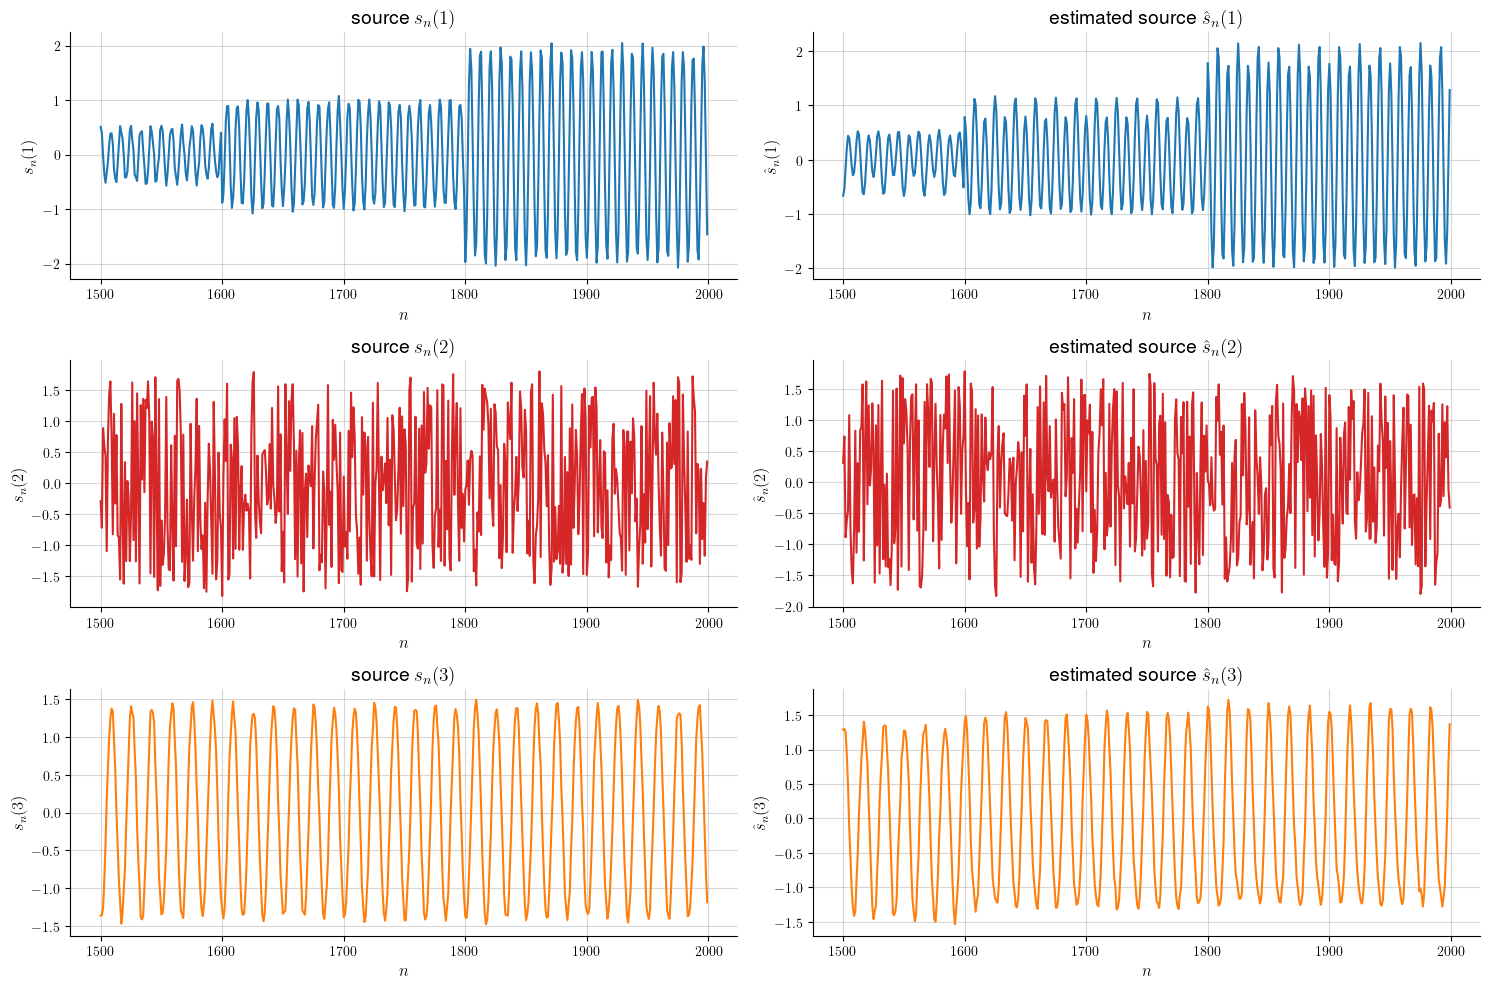

In [117]:
# figure 5 (kurtosis)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(321)

ax.plot(np.arange(a, b), s3n[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(1)$", fontsize=12)
ax.set_title("source $s_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(322)

ax.plot(np.arange(a, b), s1p_hat4[a:b])
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(1)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(1)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(323)

ax.plot(np.arange(a, b), s2n[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(2)$", fontsize=12)
ax.set_title("source $s_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(324)

ax.plot(np.arange(a, b), s2p_hat4[a:b], color="tab:red")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(2)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(2)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(325)

ax.plot(np.arange(a, b), s1n[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$s_n(3)$", fontsize=12)
ax.set_title("source $s_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(326)

ax.plot(np.arange(a, b), s3p_hat4[a:b], color="tab:orange")
ax.set_xlabel("$n$", fontsize=12)
ax.set_ylabel("$\hat{s}_n(3)$", fontsize=12)
ax.set_title("estimated source $\hat{s}_n(3)$", fontsize=14)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

fig.tight_layout()

plt.savefig("figs/fig-5.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [203]:
# Projection pursuit
M = 3
N = 200
lambda1 = np.array([np.random.rand(), 10*(np.random.rand()+0.5), 20*(np.random.rand()+0.5)])
lambda1 = np.array([1, 1, 1])

H1 = np.sqrt(np.diag(lambda1))@(np.random.rand(M, int(N/2)) + 0.5*np.random.rand(M, 1)@np.ones((1, int(N/2)))) # feature vectors for class +1
g1 = np.ones((int(N/2)))

H2 = np.sqrt(np.diag(lambda1))@(np.random.rand(M, int(N/2)) - 0.5*np.random.rand(M, 1)@np.ones((1, int(N/2)))) # feature vectors for class -1
g2 = -np.ones((int(N/2)))

Hx = np.concatenate([H1, H2], axis=-1)
gx = np.concatenate([g1, g2])
H = np.zeros((M, N))
g = np.zeros(N)

P = np.random.permutation(N)
for n in range(N):
    H[:, n] = Hx[:, P[n]] # columns are feature vectors
    g[n] = gx[P[n]] # classes

# Data pre-processing

bar_h = H.mean(axis=1) # mean vector; Mx1
Hc = H - (bar_h.reshape(-1, 1)@np.ones((1, N))) # centering

Rh_hat = np.zeros((M, M))
for n in range(N):
    Rh_hat += Hc[:, n].reshape(-1, 1)@Hc[:, n].reshape(-1, 1).T
Rh_hat = Rh_hat / (N-1)

D, U = np.linalg.eig(Rh_hat)
D = np.diag(np.sqrt(D))
Hp = np.linalg.inv(D)@U.T@Hc

# projection pursuit using Kurtosis measure

Wp = np.eye(M)
mu = 0.5 # step-size

for n in range(N):
    h = H[:, n]
    b_value = 0
    b_prime_value = 0

    for m in range(M):
        a = Wp[m, :]@h 
        b_value = 4*(a**3)
        b_prime_value = 12*(a**2)
        Wp[m, :] = b_prime_value*Wp[m, :]-b_value*h.T
    
    for m in range(M): # can use this implementation as well; Gram-Schimidt
        x = (Wp[m, :]).T
        for ell in range(m):
            x -= (Wp[m, :]@Wp[ell, :].T)*(Wp[ell, :].T)
        x = x/np.linalg.norm(x)
        Wp[m, :] = x.T

Wprime = Wp[:M-1, :]

Sp = Wprime@Hp # projection
s1p = Sp[0, :]
s2p = Sp[1, :]

xg = np.ones(N)
yg = np.ones(N)
xr = np.ones(N)
yr = np.ones(N)

for n in range(N): # for plotting data
    if g[n] == +1:
        xg[n] = Sp[0, n] # x-coordinate
        yg[n] = Sp[1, n] # y-coordinate
    else:
        xr[n] = Sp[0, n] # x-coordinate
        yr[n] = Sp[1, n] # y-coordinate

xg3 = np.ones(N)
yg3 = np.ones(N)
zg3 = np.ones(N)
xr3 = np.ones(N)
yr3 = np.ones(N)
zr3 = np.ones(N)

for n in range(N): # for 3-D plot of original data
    if g[n] == +1:
        xg3[n] = H[0, n] # x-coordinate
        yg3[n] = H[1, n] # y-coordinate
        zg3[n] = H[2, n] # z-coordinate
    else:
        xr3[n] = H[0, n] # x-coordinate
        yr3[n] = H[1, n] # y-coordinate
        zr3[n] = H[2, n] # z-coordinate

xg3p = np.ones(N)
yg3p = np.ones(N)
zg3p = np.ones(N)
xr3p = np.ones(N)
yr3p = np.ones(N)
zr3p = np.ones(N)

for n in range(N): # for 3-D plot of centered and normalized data
    if g[n] == +1:
        xg3p[n] = Hp[0, n] # x-coordinate
        yg3p[n] = Hp[1, n] # y-coordinate
        zg3p[n] = Hp[2, n] # z-coordinate
    else:
        xr3p[n] = Hp[0, n] # x-coordinate
        yr3p[n] = Hp[1, n] # y-coordinate
        zr3p[n] = Hp[2, n] # z-coordinate

U1 = Wprime.T

xp = np.ones(N)
yp = np.ones(N)
zp = np.ones(N)

k = 0
for a in np.arange(-2.5, 2.5, 0.1): # plane on which projection is occuring, range of the two columns of U1
    for b in np.arange(-2.5, 2.5, 0.1):
        r = U1@np.array([[a], [b]])
        xp[k] = r[0][0]
        yp[k] = r[1][0]
        zp[k] = r[2][0]
        k+=1

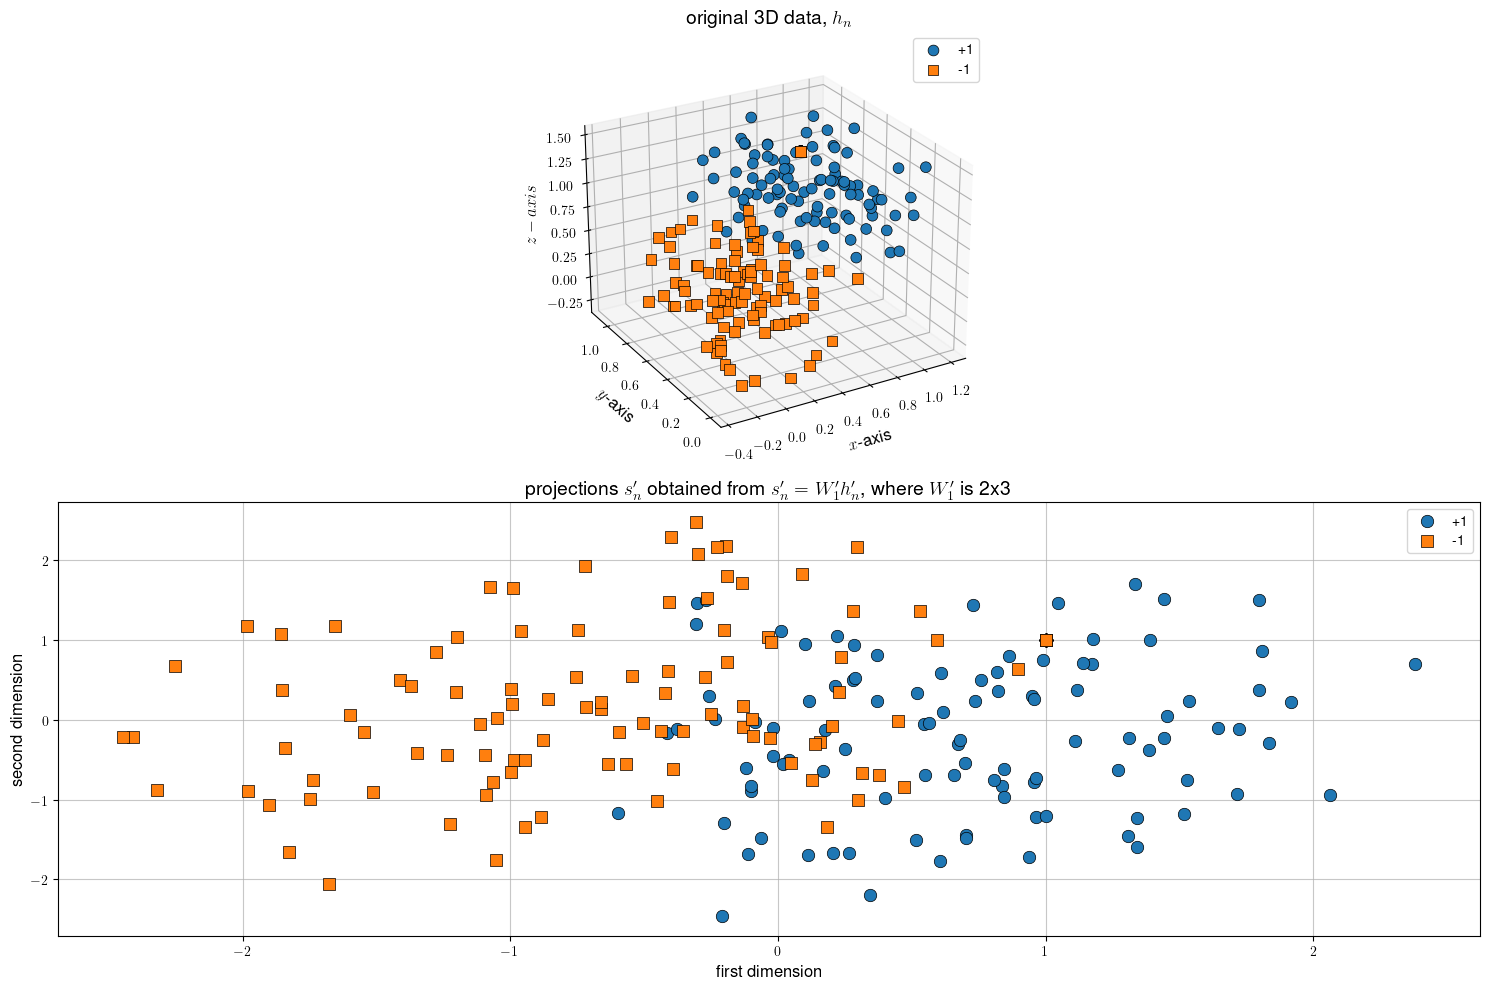

In [195]:
# figure 6 (scatter diagrams)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')

ax.scatter(xg3, yg3, zg3, s=60, alpha=1, zorder=3, label="+1", edgecolor="black", linewidth=0.5) 
ax.scatter(xr3, yr3, zr3, s=60, alpha=1, zorder=3, label="-1", marker="s", edgecolor="black", linewidth=0.5) 
ax.invert_yaxis()
ax.invert_xaxis()
ax.zaxis.set_rotate_label(False)
ax.view_init(25, 60)
ax.set_xlabel("$x$-axis", fontsize=12)
ax.set_ylabel("$y$-axis", fontsize=12)
ax.set_zlabel("$z-axis$", fontsize=12, rotation=90)
ax.set_title("original 3D data, ${h_n}$", fontsize=14)
ax.legend()
plt.grid(alpha=0.7)

ax = fig.add_subplot(212)

ax.scatter(xg, yg, s=80, alpha=1, zorder=3, label="+1", edgecolor="black", linewidth=0.5) 
ax.scatter(xr, yr, s=80, alpha=1, zorder=3, label="-1", marker="s", edgecolor="black", linewidth=0.5) 
ax.set_xlabel("first dimension", fontsize=12)
ax.set_ylabel("second dimension", fontsize=12)
ax.set_title("projections ${s_n'}$ obtained from $s_n'=W_1'h_n'$, where $W_1'$ is 2x3", fontsize=14)
ax.legend()
plt.grid(alpha=0.7)

fig.tight_layout()

plt.savefig("figs/fig-6.pdf", format="pdf", bbox_inches="tight")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


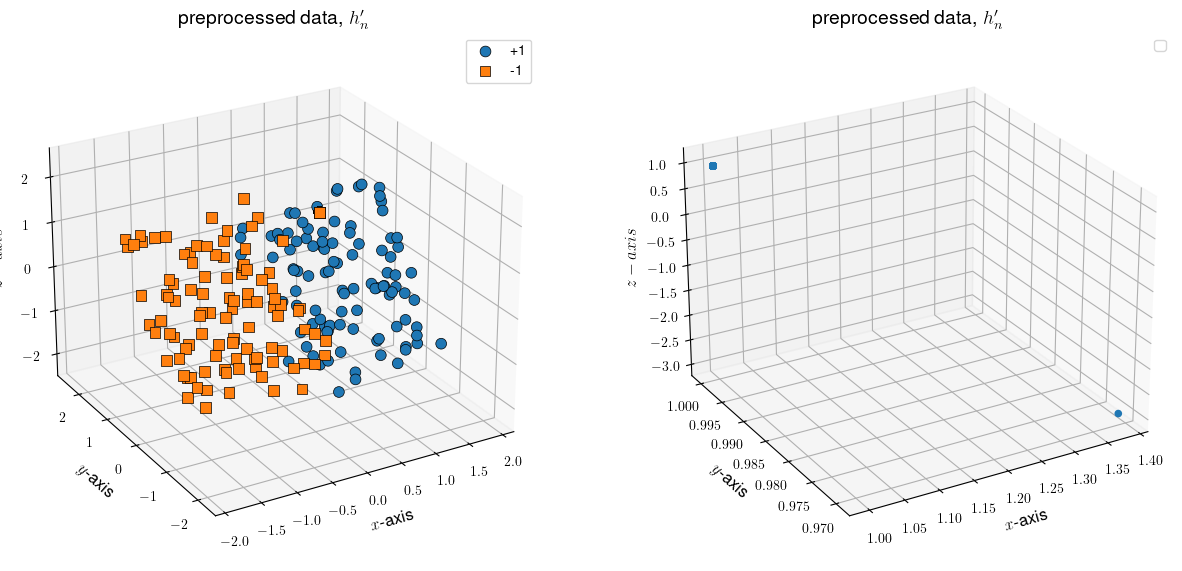

In [201]:
# figure 7 (3D scatter diagrams)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(121, projection='3d')

ax.scatter(xg3p, yg3p, zg3p, s=60, alpha=1, zorder=3, label="+1", edgecolor="black", linewidth=0.5) 
ax.scatter(xr3p, yr3p, zr3p, s=60, alpha=1, zorder=3, label="-1", marker="s", edgecolor="black", linewidth=0.5) 
ax.invert_yaxis()
ax.invert_xaxis()
ax.zaxis.set_rotate_label(False)
ax.view_init(25, 60)
ax.set_xlabel("$x$-axis", fontsize=12)
ax.set_ylabel("$y$-axis", fontsize=12)
ax.set_zlabel("$z-axis$", fontsize=12, rotation=90)
ax.set_title("preprocessed data, ${h_n'}$", fontsize=14)
ax.legend()
plt.grid(alpha=0.7)

ax = fig.add_subplot(122, projection='3d')

#ax.scatter(xg3p, yg3p, zg3p, s=60, alpha=1, zorder=3, label="+1", edgecolor="black", linewidth=0.5) 
#ax.scatter(xr3p, yr3p, zr3p, s=60, alpha=1, zorder=3, label="-1", marker="s", edgecolor="black", linewidth=0.5) 
ax.scatter(xp, yp, zp)
ax.invert_yaxis()
ax.invert_xaxis()
ax.zaxis.set_rotate_label(False)
ax.view_init(25, 60)
ax.set_xlabel("$x$-axis", fontsize=12)
ax.set_ylabel("$y$-axis", fontsize=12)
ax.set_zlabel("$z-axis$", fontsize=12, rotation=90)
ax.set_title("preprocessed data, ${h_n'}$", fontsize=14)
ax.legend()
plt.grid(alpha=0.7)

In [202]:
xp

array([1.38377395, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     